<a href="https://colab.research.google.com/github/FaragoFa/PDI/blob/main/PDI_Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Faragó Facundo - 114462

# ACTIVIDAD PRACTICA 4

# Cargar repositorio

In [1]:
! git clone https://github.com/FaragoFa/PDI.git

Cloning into 'PDI'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


# Importar librerias e Imagenes

In [12]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
import matplotlib.image as plti    #Para guardar imagenes.
%matplotlib inline

#Cargo imagen
img_rgb = imageio.imread('/content/PDI/Tizona256.jpg')/255

# Funciónes

## Histograma

In [3]:
def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

## Operaciones con matrices

In [4]:
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

## RGB - YIQ

In [5]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

## Error medio cuadratico

In [6]:
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

# Practica Transformada de Fourier:

## Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. 

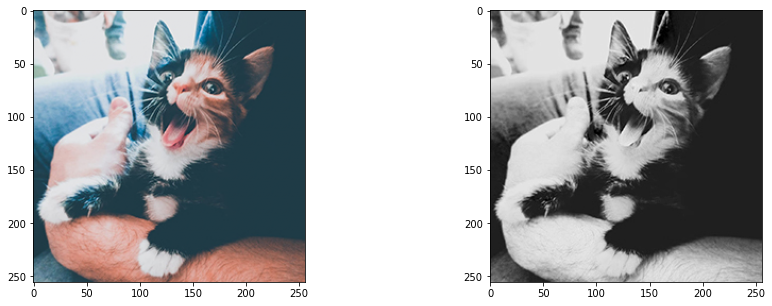

In [10]:
img = img_rgb[:,:,0]/255

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

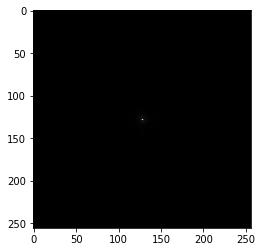

In [21]:
x = np.fft.fft2(img)
x = np.fft.fftshift(x)

xm = np.abs(x)
xp = np.angle(x)

plt.imshow(xm,'gray')

## Mostrar el módulo en escala logarítmica

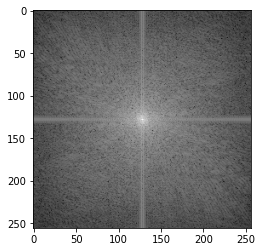

In [22]:
xml = np.log(xm)

plt.imshow(xml,'gray')

plti.imsave("Espectro.png", xml, cmap='gray')

## Guardar el espectro como imagen .png y modificarla (filtros)

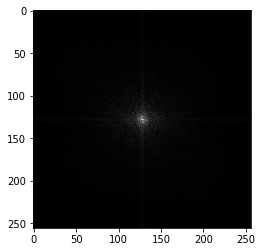

In [66]:
N, M = x.shape
alpha=1
beta=500
Im_log = np.log10(alpha+xm)*beta
Im_log = Im_log/Im_log.max()

plt.imshow(Im_log, 'gray')
plti.imsave("fft.png",Im_log,cmap='gray')

## Implementar la transformada inversa que convierta el espectro guardado en la imagen original

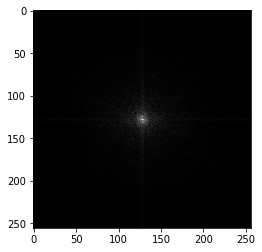

In [72]:
y_mod_log = imageio.imread("fft.png")[:,:,0]/255
y_mod_log = y_mod_log * 1000
plt.imshow(y_mod_log,'gray')

0.0003717726441946517


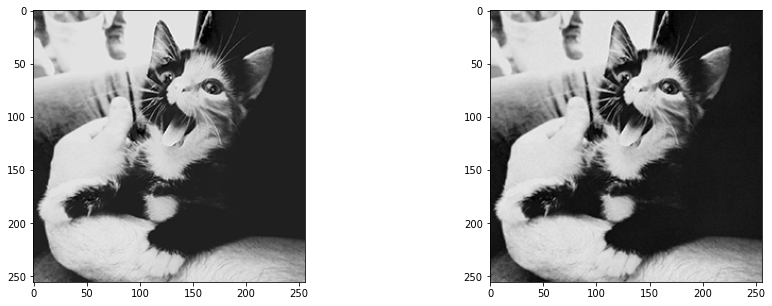

In [73]:
IIm = 10**(y_mod_log/beta)-alpha

#spectrum = np.empty(IIm.shape, dtype=complex) #Para crear una matriz vacia del tipo compleja.

spectrum = IIm * np.exp(1j * xp)
#spectrum = spectrum * N * M

image_back = np.fft.ifft2(np.fft.ifftshift(spectrum))

#plt.imshow(np.abs(image_back),'gray')
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img,'gray')
axes[1].imshow(np.abs(image_back), 'gray')

print(rmse(img,np.abs(image_back)))